In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cancer = load_breast_cancer()

In [ ]:
X = cancer.data
y = cancer.target

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [ ]:
print(confusion_matrix)

<function confusion_matrix at 0x7cccdec5f560>


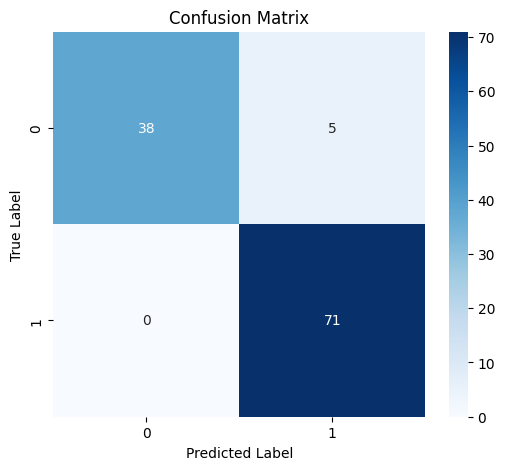

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix,annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
accuracy_score(y_test,y_pred) * 100

95.6140350877193

In [ ]:
clf.score(x_test,y_test) * 100

95.6140350877193

In [ ]:
sample = [[1.321e+01, 2.525e+01, 8.410e+01, 5.379e+02, 8.791e-02, 5.205e-02,
       2.772e-02, 2.068e-02, 1.619e-01, 5.584e-02, 2.084e-01, 1.350e+00,
       1.314e+00, 1.758e+01, 5.768e-03, 8.082e-03, 1.510e-02, 6.451e-03,
       1.347e-02, 1.828e-03, 1.435e+01, 3.423e+01, 9.129e+01, 6.329e+02,
       1.289e-01, 1.063e-01, 1.390e-01, 6.005e-02, 2.444e-01, 6.788e-02]]

In [ ]:
clf.predict(sample)

array([1])

In [ ]:
sample_pred = clf.predict(sample)

In [ ]:
cancer.target_names[sample_pred[0]]

'benign'

In [ ]:
# finding the best value of K
for j in range(1,50,2):
  knn = KNeighborsClassifier(n_neighbors=j)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  print(j, " ", accuracy_score(y_test,y_pred))


1   0.9298245614035088
3   0.9298245614035088
5   0.956140350877193
7   0.956140350877193
9   0.956140350877193
11   0.9824561403508771
13   0.9736842105263158
15   0.9649122807017544
17   0.9649122807017544
19   0.9649122807017544
21   0.9649122807017544
23   0.956140350877193
25   0.9473684210526315
27   0.9473684210526315
29   0.9473684210526315
31   0.9473684210526315
33   0.9473684210526315
35   0.9473684210526315
37   0.9473684210526315
39   0.9473684210526315
41   0.9473684210526315
43   0.9473684210526315
45   0.9473684210526315
47   0.9473684210526315
49   0.9473684210526315


In [ ]:
#
score=[]
neighbors = list(range(1, 50, 2))
for k in neighbors:
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(x_train, y_train)

   score.append(knn.score(x_test,y_test))
optimal_k = neighbors[score.index(max(score))]
print(optimal_k)
print(max(score))

11
0.9824561403508771


In [ ]:
score_list = []
neighbors = list(range(1,50,2))
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x_train,y_train,cv=10, scoring='accuracy')
  score_list.append(scores.mean().round(2))
  print("k = ", k, " ", "score = ", scores.mean().round(5))
  optimal_k = neighbors[score_list.index(max(score_list))]
print("======================")
print("best K value = ", optimal_k)

k =  1   score =  0.91179
k =  3   score =  0.92739
k =  5   score =  0.9185
k =  7   score =  0.92068
k =  9   score =  0.9185
k =  11   score =  0.91855
k =  13   score =  0.9185
k =  15   score =  0.9185
k =  17   score =  0.9185
k =  19   score =  0.91633
k =  21   score =  0.91633
k =  23   score =  0.9185
k =  25   score =  0.91633
k =  27   score =  0.91633
k =  29   score =  0.91415
k =  31   score =  0.91198
k =  33   score =  0.91198
k =  35   score =  0.9142
k =  37   score =  0.91633
k =  39   score =  0.91411
k =  41   score =  0.91188
k =  43   score =  0.91188
k =  45   score =  0.90527
k =  47   score =  0.90304
k =  49   score =  0.90749
best K value =  3
